In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
plt.ioff()
import re

In [148]:
pd.set_option("display.max_columns", None)
pd.set_option('display.precision', 6)  # Change 6 to the number of decimal places you need
pd.options.display.float_format = '{:.6f}'.format

In [163]:
#res = pd.read_csv(r'/Users/lukasboegl/Documents/Uni/SA/CrimeHU_all/podor_2016.csv', sep=';', encoding='latin-1')

# big experiment table
res = pd.read_csv(r'/Users/lukasboegl/Downloads/ThesisResultscsvtosave.csv')


# regRF variations + benchmarks in one table, just select what is currently being compared down below
#res = pd.read_csv(r'/Users/lukasboegl/Documents/thesis/thesisresults.csv', na_values='-')
#res = pd.read_csv(r'/Users/lukasboegl/Documents/thesis/nexttryresults.csv', na_values='-')


#Thesisgoatresulttable

In [164]:
#res.iloc[:, 1:5] = res.iloc[:, 1:5] * 0.001

In [165]:
#res['ID'] = range(1, len(res) + 1)
#res.columns = res.columns.str.replace('CN_W', 'CNW')

In [166]:
print(res.shape)
res.head(7)

(69, 13)


,nCLu,S1_ward_CN,S1_ward_W,S1_azp_CN,S1_azp_W,S2_ward_CN,S2_ward_W,S2_azp_CN,S2_azp_W,S3_ward_CN,S3_ward_W,S3_azp_CN,S3_azp_W
0,2,688.000000,689.000000,712.000000,665.000000,0.734000,0.707000,0.731000,0.709000,0.654000,0.649000,0.644000,0.666000
1,3,689.000000,690.000000,688.000000,665.000000,0.760000,0.721000,0.718000,0.708000,0.674000,0.666000,0.672000,0.663000
2,4,690.000000,691.000000,715.000000,684.000000,0.754000,0.724000,0.697000,0.698000,0.694000,0.681000,0.673000,0.678000
3,5,691.000000,692.000000,698.000000,673.000000,0.751000,0.722000,0.696000,0.710000,0.710000,0.680000,0.690000,0.678000
4,6,692.000000,693.000000,705.000000,669.000000,0.735000,0.722000,0.704000,0.706000,0.713000,0.684000,0.627000,0.643000
5,7,693.000000,694.000000,689.000000,660.000000,0.727000,0.710000,0.717000,0.706000,0.735000,0.714000,0.710000,0.694000
6,8,694.000000,695.000000,721.000000,698.000000,0.751000,0.737000,0.704000,0.703000,0.725000,0.698000,0.682000,0.683000


In [167]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nCLu        69 non-null     int64  
 1   S1_ward_CN  69 non-null     float64
 2   S1_ward_W   69 non-null     float64
 3   S1_azp_CN   69 non-null     float64
 4   S1_azp_W    69 non-null     float64
 5   S2_ward_CN  69 non-null     float64
 6   S2_ward_W   69 non-null     float64
 7   S2_azp_CN   69 non-null     float64
 8   S2_azp_W    69 non-null     float64
 9   S3_ward_CN  69 non-null     float64
 10  S3_ward_W   69 non-null     float64
 11  S3_azp_CN   69 non-null     float64
 12  S3_azp_W    69 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 7.1 KB


In [154]:
def add_average_columns(df):
    # Define prefixes and suffixes based on your dataset
    methods = ['ward', 'azp', 'skater', 'kmeans', 'maxp', 'rf', 'gwr', 'gwrf']
    types = ['CN', 'W']
    sizes = ['big', 'small']

    # Iterate through each combination of method, type, and size
    for method in methods:
        for type_ in types:
            for size in sizes:
                # Construct column names for each split and check if they exist in the DataFrame
                cols = [f"{method}_S{i}_{type_}_{size}" for i in range(1, 4)]
                if all(col in df.columns for col in cols):
                    # Calculate the average and create a new column
                    df[f"{method}_AVG_{type_}_{size}"] = df[cols].mean(axis=1)
        
        # Special case for benchmarks which do not have types like 'CN' or 'W'
        if method in ['rf', 'gwr', 'gwrf']:
            for size in sizes:
                cols = [f"{method}_S{i}_{size}" for i in range(1, 4)]
                if all(col in df.columns for col in cols):
                    df[f"{method}_AVG_{size}"] = df[cols].mean(axis=1)

In [155]:
# Apply the function
add_average_columns(res)

In [158]:
columns_of_interest = ['S1_ward_CN', 'S1_ward_W', 'S1_azp_CN', 'S1_azp_W',
                        'S2_ward_CN', 'S2_ward_W', 'S2_azp_CN', 'S2_azp_W',
                        'S3_ward_CN', 'S3_ward_W', 'S3_azp_CN', 'S3_azp_W']

In [159]:
columns_of_interest = ['ward_AVG_CN_small', 'azp_AVG_CN_small', 'skater_AVG_CN_small', 'kmeans_AVG_CN_small',
                        'maxp_AVG_CN_small']

In [160]:
# Reshape the DataFrame for Friedman's test (each split as a separate column)
data_for_test = res[columns_of_interest].values.T

# Apply Friedman's test
statistic, p_value = friedmanchisquare(*data_for_test)

In [161]:
# Output the results
print(f"Friedman Test Statistic: {statistic}")
print(f"P-value: {p_value}")

Friedman Test Statistic: 6.244604316546751
P-value: 0.18161061267370104


In [162]:
# Check for statistical significance (using a common significance level, e.g., 0.05)
if p_value < 0.05:
    print("There is a significant difference in R2 values across the splits.")
else:
    print("There is no significant difference in R2 values across the splits.")

There is no significant difference in R2 values across the splits.


In [22]:
from scipy.stats import wilcoxon

In [24]:
# Select the relevant columns for the test (all splits and modeling approaches for 'ward' and 'azp')
columns_ward = ['S1_ward_CN', 'S1_ward_W', 'S2_ward_CN', 'S2_ward_W', 'S3_ward_CN', 'S3_ward_W']
columns_azp = ['S1_azp_CN', 'S1_azp_W', 'S2_azp_CN', 'S2_azp_W', 'S3_azp_CN', 'S3_azp_W']

# Aggregate R2 values for 'ward' and 'azp'
r2_ward = res[columns_ward].values.flatten()
r2_azp = res[columns_azp].values.flatten()

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(r2_ward, r2_azp)

# Output the results
print(f"Wilcoxon Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check for statistical significance (using a common significance level, e.g., 0.05)
if p_value < 0.05:
    print("There is a significant difference between 'ward' and 'azp' in terms of R2 values.")
else:
    print("There is no significant difference between 'ward' and 'azp' in terms of R2 values.")


Wilcoxon Test Statistic: 6240.0
P-value: 2.560640553249073e-50
There is a significant difference between 'ward' and 'azp' in terms of R2 values.


In [25]:
# Select the relevant columns for the test (all splits and clustering methods for 'CN' and 'W')
columns_CN = ['S1_ward_CN', 'S1_azp_CN', 'S2_ward_CN', 'S2_azp_CN', 'S3_ward_CN', 'S3_azp_CN']
columns_W = ['S1_ward_W', 'S1_azp_W', 'S2_ward_W', 'S2_azp_W', 'S3_ward_W', 'S3_azp_W']

# Aggregate R2 values for 'CN' and 'W'
r2_CN = res[columns_CN].values.flatten()
r2_W = res[columns_W].values.flatten()

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(r2_CN, r2_W)

# Output the results
print(f"Wilcoxon Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check for statistical significance (using a common significance level, e.g., 0.05)
if p_value < 0.05:
    print("There is a significant difference between 'CN' and 'W' in terms of R2 values.")
else:
    print("There is no significant difference between 'CN' and 'W' in terms of R2 values.")


Wilcoxon Test Statistic: 30782.0
P-value: 1.1740058090278665e-05
There is a significant difference between 'CN' and 'W' in terms of R2 values.


In [26]:
# Select the relevant columns for the test (ward clustering method)
columns_ward_CN = ['S1_ward_CN', 'S2_ward_CN', 'S3_ward_CN']
columns_ward_W = ['S1_ward_W', 'S2_ward_W', 'S3_ward_W']

# Select the relevant columns for the test (azp clustering method)
columns_azp_CN = ['S1_azp_CN', 'S2_azp_CN', 'S3_azp_CN']
columns_azp_W = ['S1_azp_W', 'S2_azp_W', 'S3_azp_W']

# Perform the Wilcoxon signed-rank test for 'ward'
for col_CN, col_W in zip(columns_ward_CN, columns_ward_W):
    statistic, p_value = wilcoxon(res[col_CN], res[col_W])
    
    print(f"Comparison between {col_CN} and {col_W} for 'ward':")
    print(f"Wilcoxon Test Statistic: {statistic}")
    print(f"P-value: {p_value}")

    # Check for statistical significance (using a common significance level, e.g., 0.05)
    if p_value < 0.05:
        print("There is a significant difference between 'CN' and 'W' for 'ward' in terms of R2 values.")
    else:
        print("There is no significant difference between 'CN' and 'W' for 'ward' in terms of R2 values.")
    print()

# Perform the Wilcoxon signed-rank test for 'azp'
for col_CN, col_W in zip(columns_azp_CN, columns_azp_W):
    statistic, p_value = wilcoxon(res[col_CN], res[col_W])
    
    print(f"Comparison between {col_CN} and {col_W} for 'azp':")
    print(f"Wilcoxon Test Statistic: {statistic}")
    print(f"P-value: {p_value}")

    # Check for statistical significance (using a common significance level, e.g., 0.05)
    if p_value < 0.05:
        print("There is a significant difference between 'CN' and 'W' for 'azp' in terms of R2 values.")
    else:
        print("There is no significant difference between 'CN' and 'W' for 'azp' in terms of R2 values.")
    print()


Comparison between S1_ward_CN and S1_ward_W for 'ward':
Wilcoxon Test Statistic: 1112.0
P-value: 0.7090733506847811
There is no significant difference between 'CN' and 'W' for 'ward' in terms of R2 values.

Comparison between S2_ward_CN and S2_ward_W for 'ward':
Wilcoxon Test Statistic: 1037.0
P-value: 0.30787413449866186
There is no significant difference between 'CN' and 'W' for 'ward' in terms of R2 values.

Comparison between S3_ward_CN and S3_ward_W for 'ward':
Wilcoxon Test Statistic: 374.5
P-value: 1.771530046918112e-06
There is a significant difference between 'CN' and 'W' for 'ward' in terms of R2 values.

Comparison between S1_azp_CN and S1_azp_W for 'azp':
Wilcoxon Test Statistic: 465.5
P-value: 1.525366410673715e-05
There is a significant difference between 'CN' and 'W' for 'azp' in terms of R2 values.

Comparison between S2_azp_CN and S2_azp_W for 'azp':
Wilcoxon Test Statistic: 1049.0
P-value: 0.7179276459304907
There is no significant difference between 'CN' and 'W' for 

In [27]:
# Select the relevant columns for the test (CN and W for 'ward' and 'azp')
columns_ward_CN = ['S1_ward_CN', 'S2_ward_CN', 'S3_ward_CN']
columns_azp_CN = ['S1_azp_CN', 'S2_azp_CN', 'S3_azp_CN']

columns_ward_W = ['S1_ward_W', 'S2_ward_W', 'S3_ward_W']
columns_azp_W = ['S1_azp_W', 'S2_azp_W', 'S3_azp_W']

# Perform the Wilcoxon signed-rank test for 'ward CN' vs. 'azp CN'
for col_ward_CN, col_azp_CN in zip(columns_ward_CN, columns_azp_CN):
    statistic, p_value = wilcoxon(res[col_ward_CN], res[col_azp_CN])
    
    print(f"Comparison between {col_ward_CN} and {col_azp_CN}:")
    print(f"Wilcoxon Test Statistic: {statistic}")
    print(f"P-value: {p_value}")

    # Check for statistical significance (using a common significance level, e.g., 0.05)
    if p_value < 0.05:
        print(f"There is a significant difference between 'ward CN' and 'azp CN' in terms of R2 values.")
    else:
        print(f"There is no significant difference between 'ward CN' and 'azp CN' in terms of R2 values.")
    print()

# Perform the Wilcoxon signed-rank test for 'ward W' vs. 'azp W'
for col_ward_W, col_azp_W in zip(columns_ward_W, columns_azp_W):
    statistic, p_value = wilcoxon(res[col_ward_W], res[col_azp_W])
    
    print(f"Comparison between {col_ward_W} and {col_azp_W}:")
    print(f"Wilcoxon Test Statistic: {statistic}")
    print(f"P-value: {p_value}")

    # Check for statistical significance (using a common significance level, e.g., 0.05)
    if p_value < 0.05:
        print(f"There is a significant difference between 'ward W' and 'azp W' in terms of R2 values.")
    else:
        print(f"There is no significant difference between 'ward W' and 'azp W' in terms of R2 values.")
    print()

Comparison between S1_ward_CN and S1_azp_CN:
Wilcoxon Test Statistic: 237.0
P-value: 6.514566283189801e-09
There is a significant difference between 'ward CN' and 'azp CN' in terms of R2 values.

Comparison between S2_ward_CN and S2_azp_CN:
Wilcoxon Test Statistic: 569.5
P-value: 0.0002258759202299759
There is a significant difference between 'ward CN' and 'azp CN' in terms of R2 values.

Comparison between S3_ward_CN and S3_azp_CN:
Wilcoxon Test Statistic: 2.0
P-value: 5.681729070074537e-13
There is a significant difference between 'ward CN' and 'azp CN' in terms of R2 values.

Comparison between S1_ward_W and S1_azp_W:
Wilcoxon Test Statistic: 71.0
P-value: 1.6516550126325828e-11
There is a significant difference between 'ward W' and 'azp W' in terms of R2 values.

Comparison between S2_ward_W and S2_azp_W:
Wilcoxon Test Statistic: 535.0
P-value: 0.00016081965355679246
There is a significant difference between 'ward W' and 'azp W' in terms of R2 values.

Comparison between S3_ward_W 

In [28]:
# Select the relevant columns for the test
columns_ward_CN = ['S1_ward_CN', 'S2_ward_CN', 'S3_ward_CN']
columns_ward_W = ['S1_ward_W', 'S2_ward_W', 'S3_ward_W']

columns_azp_CN = ['S1_azp_CN', 'S2_azp_CN', 'S3_azp_CN']
columns_azp_W = ['S1_azp_W', 'S2_azp_W', 'S3_azp_W']

# Aggregate R2 values for 'ward CN', 'ward W', 'azp CN', and 'azp W'
r2_ward_CN = res[columns_ward_CN].values.flatten()
r2_ward_W = res[columns_ward_W].values.flatten()

r2_azp_CN = res[columns_azp_CN].values.flatten()
r2_azp_W = res[columns_azp_W].values.flatten()

# Perform the Wilcoxon signed-rank test for 'ward CN' vs. 'ward W'
statistic, p_value = wilcoxon(r2_ward_CN, r2_ward_W)
print("Comparison between 'ward CN' and 'ward W' across all train-test splits:")
print(f"Wilcoxon Test Statistic: {statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference between 'ward CN' and 'ward W' in terms of R2 values.")
else:
    print("There is no significant difference between 'ward CN' and 'ward W' in terms of R2 values.")
print()

# Perform the Wilcoxon signed-rank test for 'azp CN' vs. 'azp W'
statistic, p_value = wilcoxon(r2_azp_CN, r2_azp_W)
print("Comparison between 'azp CN' and 'azp W' across all train-test splits:")
print(f"Wilcoxon Test Statistic: {statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference between 'azp CN' and 'azp W' in terms of R2 values.")
else:
    print("There is no significant difference between 'azp CN' and 'azp W' in terms of R2 values.")
print()


Comparison between 'ward CN' and 'ward W' across all train-test splits:
Wilcoxon Test Statistic: 7910.5
P-value: 0.0025685746605548132
There is a significant difference between 'ward CN' and 'ward W' in terms of R2 values.

Comparison between 'azp CN' and 'azp W' across all train-test splits:
Wilcoxon Test Statistic: 7431.5
P-value: 0.0009839551027149087
There is a significant difference between 'azp CN' and 'azp W' in terms of R2 values.



In [29]:
# Select the relevant columns for the test
columns_ward_CN = ['S1_ward_CN', 'S2_ward_CN', 'S3_ward_CN']
columns_azp_CN = ['S1_azp_CN', 'S2_azp_CN', 'S3_azp_CN']

columns_ward_W = ['S1_ward_W', 'S2_ward_W', 'S3_ward_W']
columns_azp_W = ['S1_azp_W', 'S2_azp_W', 'S3_azp_W']

# Aggregate R2 values for 'ward CN', 'azp CN', 'ward W', and 'azp W'
r2_ward_CN = res[columns_ward_CN].values.flatten()
r2_azp_CN = res[columns_azp_CN].values.flatten()

r2_ward_W = res[columns_ward_W].values.flatten()
r2_azp_W = res[columns_azp_W].values.flatten()

# Perform the Wilcoxon signed-rank test for 'ward CN' vs. 'azp CN'
statistic, p_value = wilcoxon(r2_ward_CN, r2_azp_CN)
print("Comparison between 'ward CN' and 'azp CN' across all train-test splits:")
print(f"Wilcoxon Test Statistic: {statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference between 'ward CN' and 'azp CN' in terms of R2 values.")
else:
    print("There is no significant difference between 'ward CN' and 'azp CN' in terms of R2 values.")
print()

# Perform the Wilcoxon signed-rank test for 'ward W' vs. 'azp W'
statistic, p_value = wilcoxon(r2_ward_W, r2_azp_W)
print("Comparison between 'ward W' and 'azp W' across all train-test splits:")
print(f"Wilcoxon Test Statistic: {statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference between 'ward W' and 'azp W' in terms of R2 values.")
else:
    print("There is no significant difference between 'ward W' and 'azp W' in terms of R2 values.")
print()


Comparison between 'ward CN' and 'azp CN' across all train-test splits:
Wilcoxon Test Statistic: 1853.5
P-value: 8.543761880805292e-25
There is a significant difference between 'ward CN' and 'azp CN' in terms of R2 values.

Comparison between 'ward W' and 'azp W' across all train-test splits:
Wilcoxon Test Statistic: 1264.0
P-value: 2.079377125846219e-27
There is a significant difference between 'ward W' and 'azp W' in terms of R2 values.



In [34]:
from scipy.stats import kruskal

In [40]:
columns_of_interest = ['S1_ward_CN', 'S1_ward_W', 'S1_azp_CN', 'S1_azp_W',
                        'S2_ward_CN', 'S2_ward_W', 'S2_azp_CN', 'S2_azp_W',
                        'S3_ward_CN', 'S3_ward_W', 'S3_azp_CN', 'S3_azp_W']

# Create a DataFrame to store the standard deviation of each column
std_dev_df = pd.DataFrame(columns=['Column', 'StandardDeviation'])

# Loop through each column
for column in columns_of_interest:
    # Extract values for the current column
    column_values = res[column].dropna()  # Drop NaN values if any
    
    # Calculate the standard deviation and store in the DataFrame
    std_dev = column_values.std()
    std_dev_df = std_dev_df.append({'Column': column, 'StandardDeviation': std_dev}, ignore_index=True)

# Display the standard deviations
print(std_dev_df)

        Column StandardDeviation
0   S1_ward_CN          0.018421
1    S1_ward_W          0.016986
2    S1_azp_CN          0.022222
3     S1_azp_W          0.022844
4   S2_ward_CN          0.012242
5    S2_ward_W          0.013498
6    S2_azp_CN          0.016959
7     S2_azp_W          0.012473
8   S3_ward_CN          0.016085
9    S3_ward_W          0.016601
10   S3_azp_CN          0.019025
11    S3_azp_W          0.014332


/var/folders/k9/8gr5x3n144dfk2rq4yppwf740000gn/T/ipykernel_1937/2376749584.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  std_dev_df = std_dev_df.append({'Column': column, 'StandardDeviation': std_dev}, ignore_index=True)
/var/folders/k9/8gr5x3n144dfk2rq4yppwf740000gn/T/ipykernel_1937/2376749584.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  std_dev_df = std_dev_df.append({'Column': column, 'StandardDeviation': std_dev}, ignore_index=True)
/var/folders/k9/8gr5x3n144dfk2rq4yppwf740000gn/T/ipykernel_1937/2376749584.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  std_dev_df = std_dev_df.append({'Column': column, 'StandardDeviation': std_dev}, ignore_index=True)
/var/folders/k9/8gr5x3n144dfk2rq4yppwf740000gn/T/

In [41]:
from scipy.stats import spearmanr

In [69]:
columns_of_interest = ['S1_ward_CN', 'S1_ward_W', 'S1_azp_CN', 'S1_azp_W',
                        'S2_ward_CN', 'S2_ward_W', 'S2_azp_CN', 'S2_azp_W',
                        'S3_ward_CN', 'S3_ward_W', 'S3_azp_CN', 'S3_azp_W']

# Create a DataFrame to store the Spearman correlation coefficient for each column
correlation_df = pd.DataFrame(columns=['Column', 'SpearmanCorrelation', 'P-value'])

# Loop through each column
for column in columns_of_interest:
    # Extract values for the current column and 'nCLu'
    values_nCLu = res[['nCLu', column]].dropna()  # Drop NaN values if any
    
    # Calculate the Spearman correlation
    spearman_corr, p_value = spearmanr(values_nCLu['nCLu'], values_nCLu[column])
    
    # Store results in the DataFrame
    correlation_df = correlation_df.append({'Column': column, 'SpearmanCorrelation': spearman_corr, 'P-value': p_value}, ignore_index=True)

# Display the DataFrame with Spearman correlation coefficients
print(correlation_df)

        Column SpearmanCorrelation   P-value
0   S1_ward_CN            0.103115  0.399148
1    S1_ward_W            0.342444  0.003974
2    S1_azp_CN            0.078168  0.523193
3     S1_azp_W            0.467163  0.000052
4   S2_ward_CN           -0.501874  0.000011
5    S2_ward_W            0.559285  0.000001
6    S2_azp_CN            0.007823  0.949131
7     S2_azp_W            0.199176  0.100852
8   S3_ward_CN           -0.148996  0.221755
9    S3_ward_W            0.106386  0.384282
10   S3_azp_CN           -0.116762  0.339348
11    S3_azp_W           -0.121987  0.318027


/var/folders/k9/8gr5x3n144dfk2rq4yppwf740000gn/T/ipykernel_1937/2825154964.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'Column': column, 'SpearmanCorrelation': spearman_corr, 'P-value': p_value}, ignore_index=True)
/var/folders/k9/8gr5x3n144dfk2rq4yppwf740000gn/T/ipykernel_1937/2825154964.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'Column': column, 'SpearmanCorrelation': spearman_corr, 'P-value': p_value}, ignore_index=True)
/var/folders/k9/8gr5x3n144dfk2rq4yppwf740000gn/T/ipykernel_1937/2825154964.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'Column': column, 'SpearmanCorrelatio

In [61]:
correlation_df = correlation_df.drop(columns='P-value')

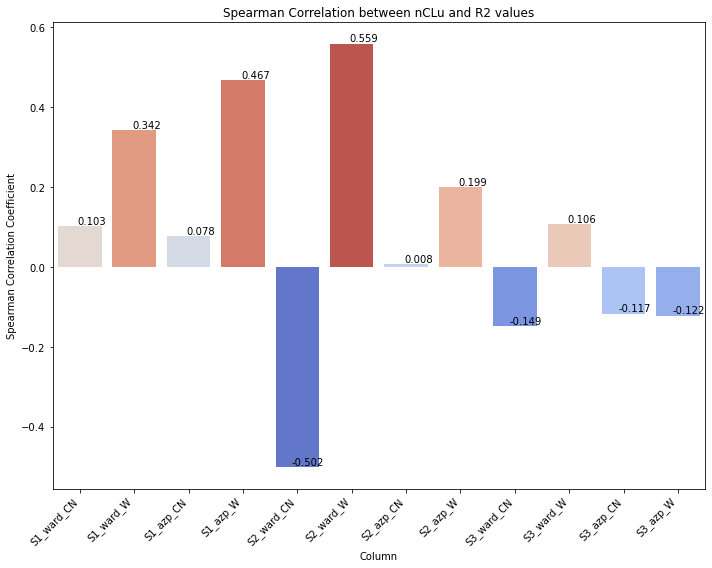

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation_df' is your DataFrame
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Column', y='SpearmanCorrelation', hue='SpearmanCorrelation', data=correlation_df, palette="coolwarm", dodge=False)

# Remove the legend
ax.legend().set_visible(False)

# Add correlation values at the end of each bar with increased distance
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width(), p.get_height()), ha='right', va='center', xytext=(5, 5), textcoords='offset points')

plt.title('Spearman Correlation between nCLu and R2 values')
plt.xlabel('Column')
plt.ylabel('Spearman Correlation Coefficient')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [77]:
columns_of_interest = ['S1_ward_CN', 'S1_ward_W', 'S1_azp_CN', 'S1_azp_W',
                        'S2_ward_CN', 'S2_ward_W', 'S2_azp_CN', 'S2_azp_W',
                        'S3_ward_CN', 'S3_ward_W', 'S3_azp_CN', 'S3_azp_W']

# Create a DataFrame to store the Spearman correlation coefficient for each column
correlation_df = pd.DataFrame(columns=['Column', 'SpearmanCorrelation', 'P-value', 'Significant'])

# Loop through each column
for column in columns_of_interest:
    # Extract values for the current column and 'nCLu'
    values_nCLu = res[['nCLu', column]].dropna()  # Drop NaN values if any
    
    # Calculate the Spearman correlation
    spearman_corr, p_value = spearmanr(values_nCLu['nCLu'], values_nCLu[column])
    
    # Determine the type of relationship
    if spearman_corr > 0:
        relationship_type = "Positive"
    elif spearman_corr < 0:
        relationship_type = "Negative"
    else:
        relationship_type = "No correlation"
    
    # Determine if the relationship is significant
    significant = "Yes" if p_value < 0.05 else "No"
    
    # Store results in the DataFrame
    correlation_df = correlation_df.append({'Column': column, 'SpearmanCorrelation': spearman_corr, 'P-value': p_value, 'Significant': significant}, ignore_index=True)
    
    # Print information about the relationship, significance, and p-value
    print(f"{column}: {relationship_type} relationship, Spearman Correlation: {spearman_corr:.3f}, P-value: {p_value:.3f}, Significant: {significant}")

# Display the DataFrame with Spearman correlation coefficients
print("\nDataFrame with Spearman correlation coefficients:")
print(correlation_df)


S1_ward_CN: Positive relationship, Spearman Correlation: 0.103, P-value: 0.399, Significant: No
S1_ward_W: Positive relationship, Spearman Correlation: 0.342, P-value: 0.004, Significant: Yes
S1_azp_CN: Positive relationship, Spearman Correlation: 0.078, P-value: 0.523, Significant: No
S1_azp_W: Positive relationship, Spearman Correlation: 0.467, P-value: 0.000, Significant: Yes
S2_ward_CN: Negative relationship, Spearman Correlation: -0.502, P-value: 0.000, Significant: Yes
S2_ward_W: Positive relationship, Spearman Correlation: 0.559, P-value: 0.000, Significant: Yes
S2_azp_CN: Positive relationship, Spearman Correlation: 0.008, P-value: 0.949, Significant: No
S2_azp_W: Positive relationship, Spearman Correlation: 0.199, P-value: 0.101, Significant: No
S3_ward_CN: Negative relationship, Spearman Correlation: -0.149, P-value: 0.222, Significant: No
S3_ward_W: Positive relationship, Spearman Correlation: 0.106, P-value: 0.384, Significant: No
S3_azp_CN: Negative relationship, Spearman 

/var/folders/k9/8gr5x3n144dfk2rq4yppwf740000gn/T/ipykernel_1937/456823604.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'Column': column, 'SpearmanCorrelation': spearman_corr, 'P-value': p_value, 'Significant': significant}, ignore_index=True)
/var/folders/k9/8gr5x3n144dfk2rq4yppwf740000gn/T/ipykernel_1937/456823604.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'Column': column, 'SpearmanCorrelation': spearman_corr, 'P-value': p_value, 'Significant': significant}, ignore_index=True)
/var/folders/k9/8gr5x3n144dfk2rq4yppwf740000gn/T/ipykernel_1937/456823604.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correla

In [90]:
data = {
    'Method': ['RF', 'GWR', 'GWRF'],
    'Split 1': [0.636, 0.7396, 0.758],
    'Split 2': [0.677, 0.74, 0.774],
    'Split 3': [0.643, 0.75493, 0.765]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

  Method  Split 1  Split 2  Split 3
0     RF   0.6360    0.677  0.64300
1    GWR   0.7396    0.740  0.75493
2   GWRF   0.7580    0.774  0.76500


In [91]:
# Display the reshaped and pivoted DataFrame
df.head()

,Method,Split 1,Split 2,Split 3
0,RF,0.6360,0.677,0.64300
1,GWR,0.7396,0.740,0.75493
2,GWRF,0.7580,0.774,0.76500


In [94]:
res.head()

,nCLu,S1_ward_CN,S1_ward_W,S1_azp_CN,S1_azp_W,S2_ward_CN,S2_ward_W,S2_azp_CN,S2_azp_W,S3_ward_CN,S3_ward_W,S3_azp_CN,S3_azp_W,ID
0,2,0.688,0.689,0.712,0.665,0.734,0.707,0.731,0.709,0.654,0.649,0.644,0.666,1
1,3,0.689,0.690,0.688,0.665,0.760,0.721,0.718,0.708,0.674,0.666,0.672,0.663,2
2,4,0.690,0.691,0.715,0.684,0.754,0.724,0.697,0.698,0.694,0.681,0.673,0.678,3
3,5,0.691,0.692,0.698,0.673,0.751,0.722,0.696,0.710,0.710,0.680,0.690,0.678,4
4,6,0.692,0.693,0.705,0.669,0.735,0.722,0.704,0.706,0.713,0.684,0.627,0.643,5


In [96]:
import pandas as pd
from scipy.stats import ttest_rel

In [103]:
columns_of_interest = ['S1_ward_CN', 'S1_ward_W', 'S1_azp_CN', 'S1_azp_W', 
                         'S2_ward_CN', 'S2_ward_W', 'S2_azp_CN', 'S2_azp_W', 
                         'S3_ward_CN', 'S3_ward_W', 'S3_azp_CN', 'S3_azp_W']

In [106]:
top3_values_df = pd.DataFrame({col: res[col].nlargest(3).tolist() for col in columns_of_interest})

In [107]:
top3_values_df.head()

,S1_ward_CN,S1_ward_W,S1_azp_CN,S1_azp_W,S2_ward_CN,S2_ward_W,S2_azp_CN,S2_azp_W,S3_ward_CN,S3_ward_W,S3_azp_CN,S3_azp_W
0,0.751,0.752,0.740,0.733,0.760,0.754,0.759,0.746,0.758,0.748,0.735,0.728
1,0.750,0.751,0.736,0.733,0.755,0.753,0.757,0.745,0.751,0.741,0.722,0.718
2,0.749,0.750,0.734,0.733,0.755,0.753,0.753,0.742,0.751,0.740,0.720,0.711


In [108]:
selected_columns_df = top3_values_df[['S1_ward_CN', 'S2_ward_CN', 'S3_ward_CN']]
selected_columns_df.head()

,S1_ward_CN,S2_ward_CN,S3_ward_CN
0,0.751,0.760,0.758
1,0.750,0.755,0.751
2,0.749,0.755,0.751


In [112]:
benchmark_values = df.set_index('Method').T

# Define the selected columns
selected_columns = ['S1_ward_CN', 'S2_ward_CN', 'S3_ward_CN']

# Perform t-tests for each split
for split in ['Split 1', 'Split 2', 'Split 3']:
    print(f"\nT-tests for {split}:")
    
    for column in selected_columns:
        # Extract the selected values from 'selected_columns_df'
        selected_values = selected_columns_df[column].values
        
        for method in df['Method']:
            # Extract the benchmark value for the corresponding method and split
            benchmark_value = benchmark_values.at[split, method]
            
            # Perform a paired t-test
            t_stat, p_value = ttest_rel(selected_values, [benchmark_value] * len(selected_values))
            
            print(f"{column} vs {method}: P-value = {p_value}")
            
            # Check if the p-value is less than the significance level (e.g., 0.05)
            if p_value < 0.05:
                print("The difference is statistically significant.")
            else:
                print("The difference is not statistically significant.")



T-tests for Split 1:
S1_ward_CN vs RF: P-value = 2.564793085739644e-05
The difference is statistically significant.
S1_ward_CN vs GWR: P-value = 0.00306768009166038
The difference is statistically significant.
S1_ward_CN vs GWRF: P-value = 0.005167993252386087
The difference is statistically significant.
S2_ward_CN vs RF: P-value = 0.00019072104169819894
The difference is statistically significant.
S2_ward_CN vs GWR: P-value = 0.009402451784545166
The difference is statistically significant.
S2_ward_CN vs GWRF: P-value = 0.5076340360826691
The difference is not statistically significant.
S3_ward_CN vs RF: P-value = 0.0003952330214267935
The difference is statistically significant.
S3_ward_CN vs GWR: P-value = 0.027674293598149522
The difference is statistically significant.
S3_ward_CN vs GWRF: P-value = 0.1835034190722739
The difference is not statistically significant.

T-tests for Split 2:
S1_ward_CN vs RF: P-value = 6.254495424699012e-05
The difference is statistically significant.

In [8]:
columns_to_consider = [col for col in res.columns if col not in ['nCLu', 'ID']]

# Calculate the sum for each row across selected columns (higher values are better)
res['sum_compromise'] = res[columns_to_consider].sum(axis=1)

# Identify the three rows with the highest sum_compromise
best_rows = res.nlargest(3, 'sum_compromise').drop(columns='sum_compromise')

In [ ]:
# Display the resulting dataframe with the three best rows
print(best_rows)

In [9]:
best_rows.head()

,nCLu,S1_ward_CN,S1_ward_W,S1_azp_CN,S1_azp_W,S2_ward_CN,S2_ward_W,S2_azp_CN,S2_azp_W,S3_ward_CN,S3_ward_W,S3_azp_CN,S3_azp_W,ID
9,11,0.742,0.737,0.740,0.715,0.750,0.734,0.759,0.741,0.745,0.730,0.690,0.690,10
22,24,0.744,0.734,0.728,0.710,0.734,0.713,0.742,0.736,0.743,0.740,0.692,0.687,23
56,58,0.746,0.742,0.728,0.725,0.731,0.736,0.728,0.725,0.733,0.731,0.689,0.686,57


In [10]:
columns_to_consider = [col for col in res.columns if col not in ['nCLu', 'ID']]

# Calculate the mean for each column
mean_values = res[columns_to_consider].mean(axis=0)

# Create a new dataframe with mean values
mean_df = pd.DataFrame(mean_values).transpose()

In [11]:
mean_df.head()

,S1_ward_CN,S1_ward_W,S1_azp_CN,S1_azp_W,S2_ward_CN,S2_ward_W,S2_azp_CN,S2_azp_W,S3_ward_CN,S3_ward_W,S3_azp_CN,S3_azp_W,sum_compromise
0,0.728739,0.728884,0.698768,0.690826,0.73042,0.728275,0.718377,0.717913,0.728783,0.721652,0.687101,0.686783,8.566522


S1_ward_CN:
  Shapiro p-value = 0.0000
  Shapiro-Wilk test is significant: The data may not be normally distributed.


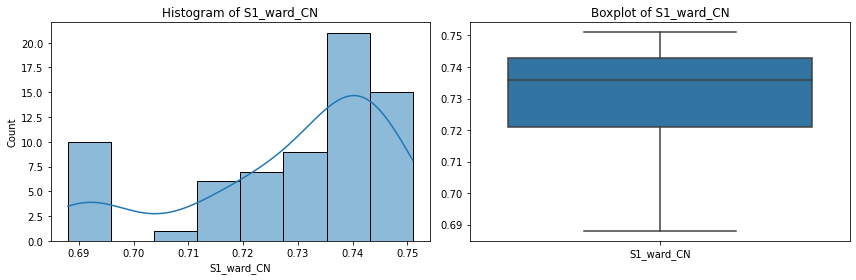



S1_ward_W:
  Shapiro p-value = 0.0000
  Shapiro-Wilk test is significant: The data may not be normally distributed.


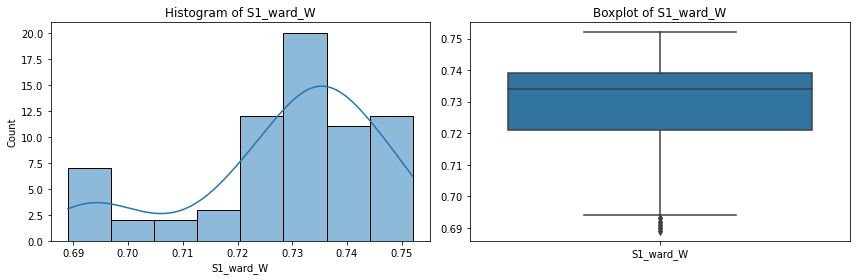



S1_azp_CN:
  Shapiro p-value = 0.2230
  Shapiro-Wilk test is not significant: No strong evidence against normal distribution.


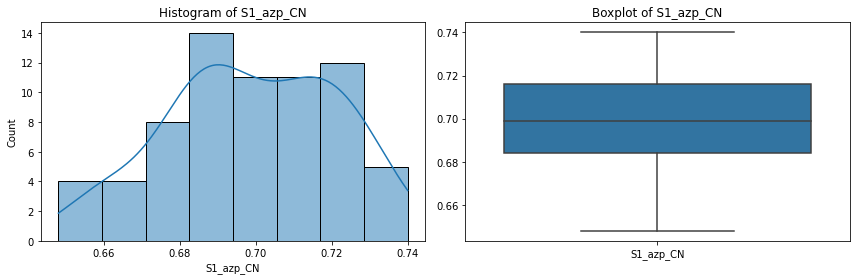



S1_azp_W:
  Shapiro p-value = 0.0539
  Shapiro-Wilk test is not significant: No strong evidence against normal distribution.


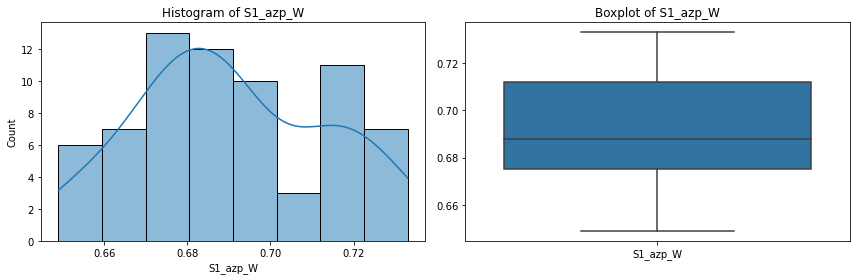



S2_ward_CN:
  Shapiro p-value = 0.0215
  Shapiro-Wilk test is significant: The data may not be normally distributed.


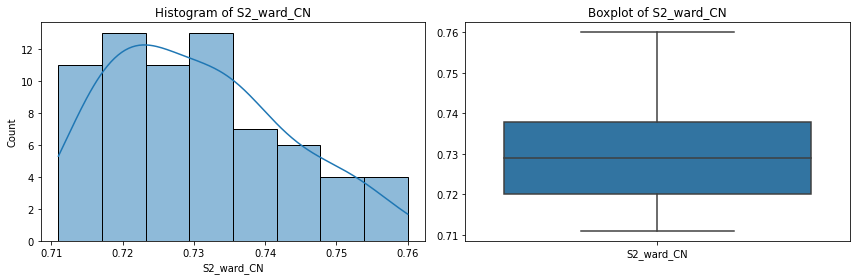



S2_ward_W:
  Shapiro p-value = 0.3072
  Shapiro-Wilk test is not significant: No strong evidence against normal distribution.


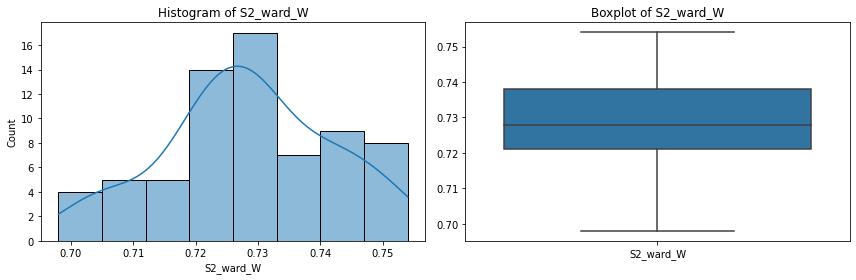



S2_azp_CN:
  Shapiro p-value = 0.0705
  Shapiro-Wilk test is not significant: No strong evidence against normal distribution.


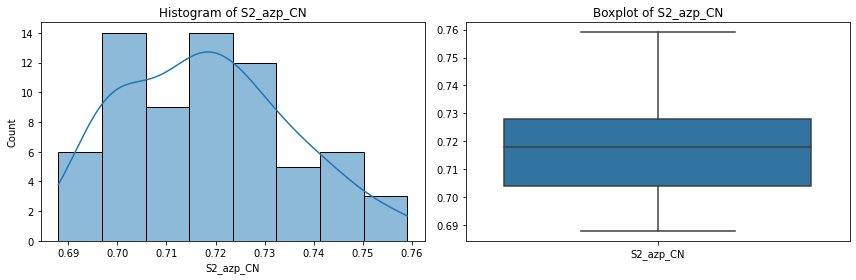



S2_azp_W:
  Shapiro p-value = 0.0533
  Shapiro-Wilk test is not significant: No strong evidence against normal distribution.


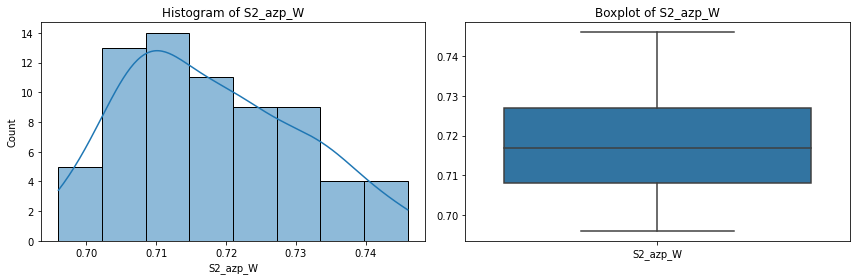



S3_ward_CN:
  Shapiro p-value = 0.0000
  Shapiro-Wilk test is significant: The data may not be normally distributed.


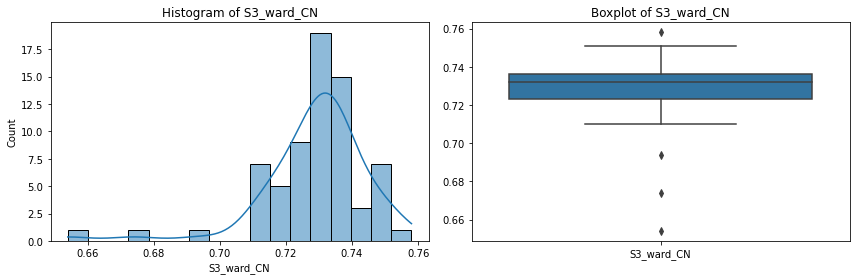



S3_ward_W:
  Shapiro p-value = 0.0000
  Shapiro-Wilk test is significant: The data may not be normally distributed.


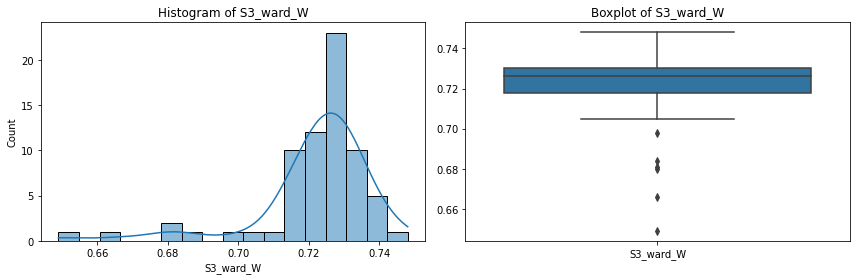



S3_azp_CN:
  Shapiro p-value = 0.7686
  Shapiro-Wilk test is not significant: No strong evidence against normal distribution.


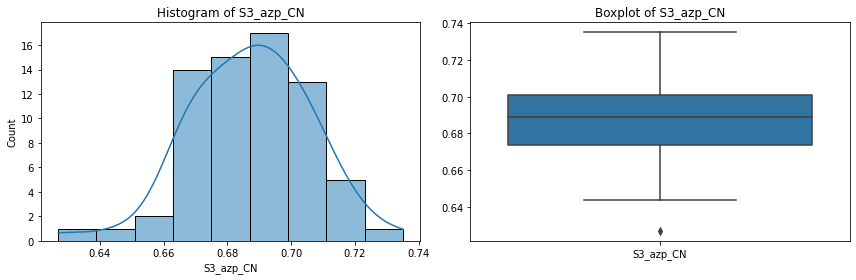



S3_azp_W:
  Shapiro p-value = 0.7243
  Shapiro-Wilk test is not significant: No strong evidence against normal distribution.


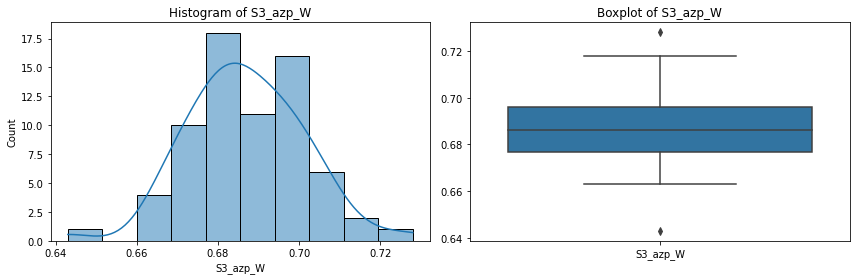

In [18]:
columns_to_test = ['S1_ward_CN', 'S1_ward_W', 'S1_azp_CN', 'S1_azp_W',
                   'S2_ward_CN', 'S2_ward_W', 'S2_azp_CN', 'S2_azp_W',
                   'S3_ward_CN', 'S3_ward_W', 'S3_azp_CN', 'S3_azp_W']
alpha = 0.05
for column in columns_to_test:
    _, shapiro_p_value = shapiro(res[column])

    print(f"{column}:")
    print(f"  Shapiro p-value = {shapiro_p_value:.4f}")

    if shapiro_p_value < alpha:
        print("  Shapiro-Wilk test is significant: The data may not be normally distributed.")
    else:
        print("  Shapiro-Wilk test is not significant: No strong evidence against normal distribution.")

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(res[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=res[[column]])
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

    print("\n")